In [97]:
#All imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import random
import math
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

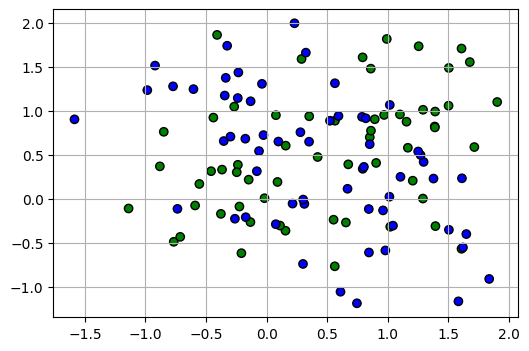

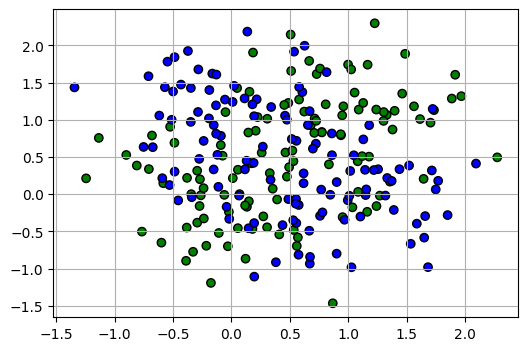

In [98]:
########################################
#Part(a) #Synthetic data generation
########################################
#Define means and covariances
def generate(n):
  mean1=np.array([0,0])
  mean2=np.array([1,1])
  mean3=np.array([1,0])
  mean4=np.array([0,1])
  cov=np.array([[0.3, 0], [0, 0.3]])

#Sample data points from the bivariate Gaussian distribution
#You can use "np.random.multivariate_normal" function to sample the data points from the multivariate Gaussian distribution
  p1 = np.random.multivariate_normal(mean1, cov, n)
  p2 = np.random.multivariate_normal(mean2, cov, n)
  p3 = np.random.multivariate_normal(mean3, cov, n)
  p4 = np.random.multivariate_normal(mean4, cov, n)

#Generate training data(generates 4n/3 training points)
  training_class1 = np.concatenate((p1[:int(n/3)], p2[:int(n/3)]))
  training_class2 = np.concatenate((p3[:int(n/3)], p4[:int(n/3)]))
  X_train = np.concatenate((training_class1, training_class2))
  Y_train = np.concatenate((np.ones(2*int(n/3)), np.ones(2*int(n/3))*-1))

#Generate testing data
  test_class1 = np.concatenate((p1[int(n/3):], p2[int(n/3):]))
  test_class2 = np.concatenate((p3[int(n/3):], p4[int(n/3):]))
  X_test = np.concatenate((test_class1, test_class2))
  Y_test = np.concatenate((np.ones(int(2*(n - int(n/3)))), np.ones(int(2*(n - int(n/3))))*-1))
  return X_train, Y_train, X_test, Y_test

X_train, Y_train, X_test, Y_test = generate(90)
#Visualize the data using plt.scatter() function
plt.figure(figsize=(6,4))
plt.grid()
plt.scatter(X_train[:,0], X_train[:,1], c = ['blue' if x == -1 else 'green' for x in Y_train], edgecolor = 'k')
plt.show()
plt.figure(figsize=(6,4))
plt.grid()
plt.scatter(X_test[:,0], X_test[:,1], c = ['blue' if x == -1 else 'green' for x in Y_test], edgecolor = 'k')
plt.show()


In [99]:
#Code for different distance measures
def L1(x1, x2):
  return np.linalg.norm(x2-x1, ord=1)
def L2(x1, x2):
  return np.linalg.norm(x1-x2)
def L_inf(x1, x2):
  return max(abs(x1[0] - x2[0]), abs(x1[1] - x2[1]))

Accuracy = 66.66666666666666


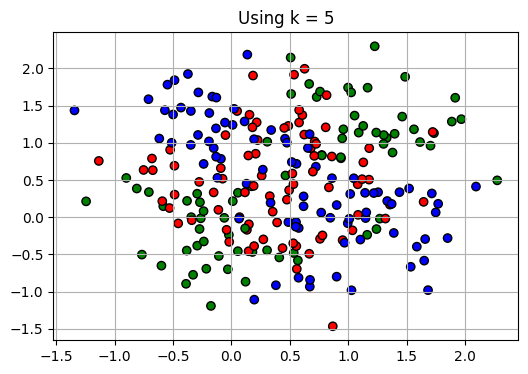

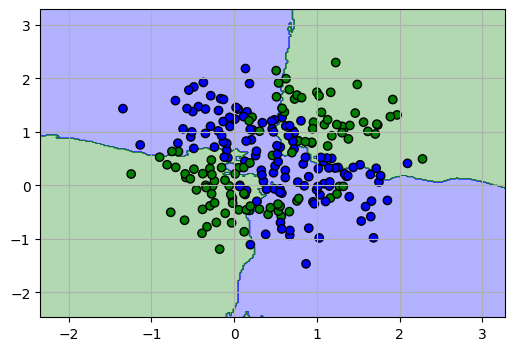

In [100]:
########################################
#Part(b) #KNN classification
########################################

#Write "kNNClassify" function
def kNNClassify(X_train,Y_train,X_test,k, f):
  '''
  #Inputs : Training data (X_train,Y_train), Test points  (X_test), Hyperparameter k
  #Outputs : Predicted class
  '''
  #Algorithm
  #1.Initialize a list to store the predictions of our algorithm
  #2.Iterate through the test points
  #3.    Initialize a list to store the distances of test point with each of the training point.
  #4.    Iterate through the training points
  #5.        Compute the distance between the test and train point
  #6.    Find out the k nearest neighbours
  #7.    Get the most frequent label of k nearest neighbours
  #8.Return the predictions
  #Fill the code
  Y_pred = []
  for x1 in X_test:
    neighbours = []
    for i in range(0, Y_train.size):
      neighbours.append((f(X_train[i], x1), Y_train[i]))
    neighbours = np.array(neighbours)
    ind = np.argsort(neighbours[:, 0])
    cnt1 = 0
    cnt_minus = 0
    for j in range(0, k):
      if(neighbours[ind[j]][1] == 1):
        cnt1 += 1
      else:
        cnt_minus += 1
    if(cnt1 > cnt_minus):
      Y_pred.append(1)
    else:
      Y_pred.append(-1)
  Y_pred = np.array(Y_pred)
  return Y_pred

#Write "KNNAccuracy" function
def KNNAccuracy(true,pred):
  '''
  #Inputs : Ground truth and predicted labels
  #Outputs : Portion of data points that are correctly classified, i.e., accuracy
  '''
  #Algorithm
  #1. Iterate through the total number of predictions
  #2.     Verify wheter the ground truth matches with the predictions
  #3. Compute and return the percentage of the correctly classified points
  #Fill the code
  correct = 0
  for i in range(0, pred.size):
    if(true[i] == pred[i]):
      correct += 1
  # print(correct/pred.size)
  return correct/pred.size*100

#Create a visual representation of predictions
pred = kNNClassify(X_train, Y_train, X_test, 5, L2)
print(f'Accuracy = {KNNAccuracy(Y_test, pred)}')
colors = []
for i in range (0, pred.size):
  if(pred[i] != Y_test[i]):
    colors.append('red')
  elif(pred[i] == -1):
    colors.append('blue')
  else:
    colors.append('green')
plt.figure(figsize=(6,4))
plt.title("Using k = 5")
plt.grid()
plt.scatter(X_test[:,0], X_test[:,1], c = colors, edgecolor = 'k')
plt.show()

#Generate and visualize the decision regions and overlay the test points
# plt.scatter(X_test[:,0], X_test[:,1], c = ['blue' if x == -1 else 'green' for x in pred])
# plt.show()
h = 0.02  # step size in the mesh

X_min = 100000
X_max = -100000
Y_min = 100000
Y_max = -100000
for i in X_test:
  X_min = min(i[0], X_min)
  X_max = max(i[0], X_max)
  Y_min = min(i[1], Y_min)
  Y_max = max(i[1], Y_max)
X_min = X_min - 1
X_max = X_max + 1
Y_min = Y_min - 1
Y_max = Y_max + 1

xx, yy = np.meshgrid(np.arange(X_min, X_max, h), np.arange(Y_min, Y_max, h))

# Use the kNNClassify function to get predictions for each point in the meshgrid
Z = np.array(kNNClassify(X_train, Y_train, np.c_[xx.ravel(), yy.ravel()], 25, L2))
Z = Z.reshape(xx.shape)

# Plot decision regions
plt.figure(figsize=(6,4))
plt.grid()
plt.contourf(xx, yy, Z, cmap=ListedColormap(['blue', 'green']), alpha=0.3)
plt.scatter(X_test[:,0], X_test[:,1], c = ['blue' if x == -1 else 'green' for x in pred], edgecolor = 'k')


best k = 19
Accuracy = 69.58333333333333


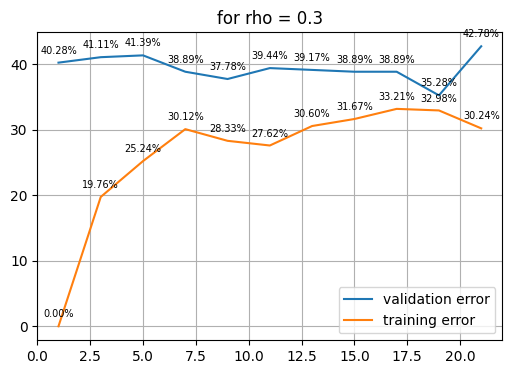

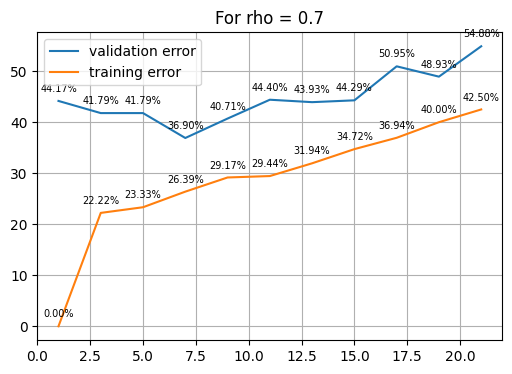

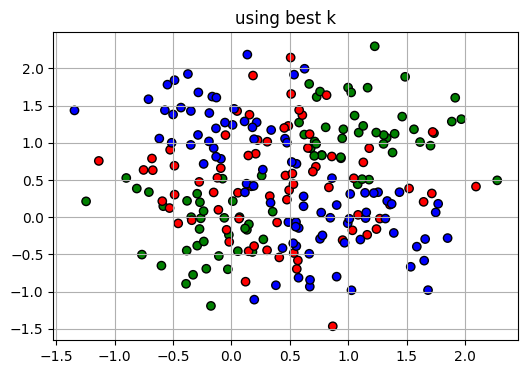

'\nAccuracy slightly improved!\n'

In [101]:
####################################
#Part(c): Parameter selection: What is good value for k?
####################################
#Write holdoutCVkNN() Function
def holdoutCVkNN(k_range,numrep,rho, X_train, Y_train):
  #Iterate through range of k values
    #Iterate through number of repetations
      #Hold out rho fraction of training data in each repetition.
  val_array = []
  train_array = []
  for k in k_range:
    val_acc_avg = 0
    train_acc_avg = 0
    for i in range(0, numrep):
      ind = np.random.choice(X_train.shape[0], int(X_train.shape[0]*(1-rho)), replace = False)
      new_X_train = []
      new_Y_train = []
      new_X_test = []
      new_Y_test = []
      for j in range(0, X_train.shape[0]):
        if j in ind:
          new_X_train.append(X_train[j])
          new_Y_train.append(Y_train[j])
        else:
          new_X_test.append(X_train[j])
          new_Y_test.append(Y_train[j])
      new_X_train = np.array(new_X_train)
      new_Y_train = np.array(new_Y_train)
      new_X_test = np.array(new_X_test)
      new_Y_test = np.array(new_Y_test)
      Y_validation_test = kNNClassify(new_X_train, new_Y_train, new_X_test, k, L2)
      Validation_acc = KNNAccuracy(new_Y_test, Y_validation_test)
      Y_training_test = kNNClassify(new_X_train, new_Y_train, new_X_train, k, L2)
      Training_acc = KNNAccuracy(new_Y_train, Y_training_test)
      val_acc_avg += 100 - Validation_acc
      train_acc_avg += 100 - Training_acc
    val_acc_avg /= numrep
    train_acc_avg /= numrep
    val_array.append(val_acc_avg)
    train_array.append(train_acc_avg)
  val_array = np.array(val_array)
  train_array = np.array(train_array)
  return val_array, train_array

  #Return errors on training and validation data



#Plot training and validation errors for different values of k
k_range = [2*i+1 for i in range(0, 11)]
val_array, train_array = holdoutCVkNN(k_range, 10, 0.3, X_train, Y_train)
plt.figure(figsize=(6,4))
plt.plot(k_range, val_array)
plt.plot(k_range, train_array)
plt.grid()
plt.title('for rho = 0.3')
plt.legend(['validation error', 'training error'])
for i, txt in enumerate(val_array):
  plt.annotate(f'{txt:.2f}%', (k_range[i], val_array[i]), textcoords="offset points", xytext=(0,5), ha='center', va='bottom',fontsize = 7)
for i, txt in enumerate(train_array):
  plt.annotate(f'{txt:.2f}%', (k_range[i], train_array[i]), textcoords="offset points", xytext=(0,5), ha='center', va='bottom',fontsize = 7)

#what is the best value for k?
'''
Best value of k will be that for which validation error is low, k being generally between 13 - 19

'''
k_ind = 0
for i in range(0, len(k_range)):
  if val_array[i] < val_array[k_ind]:
    k_ind = i
print(f"best k = {k_range[k_ind]}")
#Effect of rho and number repetations on k
'''
For higher values of number repetitions, we get more accurate values of error for each k
For higher values of rho, like 0.7, the validation error and training error is much higher!
Further more, this error increases as k increases, i.e for high (rho, k) there is high error
'''
val_array, train_array = holdoutCVkNN(k_range, 10, 0.7, X_train, Y_train)
plt.figure(figsize=(6,4))
plt.plot(k_range, val_array)
plt.plot(k_range, train_array)
for i, txt in enumerate(val_array):
  plt.annotate(f'{txt:.2f}%', (k_range[i], val_array[i]), textcoords="offset points", xytext=(0,5), ha='center', va='bottom',fontsize = 7)
for i, txt in enumerate(train_array):
  plt.annotate(f'{txt:.2f}%', (k_range[i], train_array[i]), textcoords="offset points", xytext=(0,5), ha='center', va='bottom',fontsize = 7)
plt.grid()
plt.title('For rho = 0.7')
plt.legend(['validation error', 'training error'])
#Evaluate the performance on test set with the best hyper parameters ( i.e best k ).
pred = kNNClassify(X_train, Y_train, X_test, k_range[k_ind], L2)
print(f'Accuracy = {KNNAccuracy(Y_test, pred)}')
colors = []
for i in range (0, pred.size):
  if(pred[i] != Y_test[i]):
    colors.append('red')
  elif(pred[i] == -1):
    colors.append('blue')
  else:
    colors.append('green')
plt.figure(figsize=(6,4))
plt.grid()
plt.title('using best k')
plt.scatter(X_test[:,0], X_test[:,1], c = colors, edgecolor = 'k')
plt.show()
'''
Accuracy slightly improved!
'''

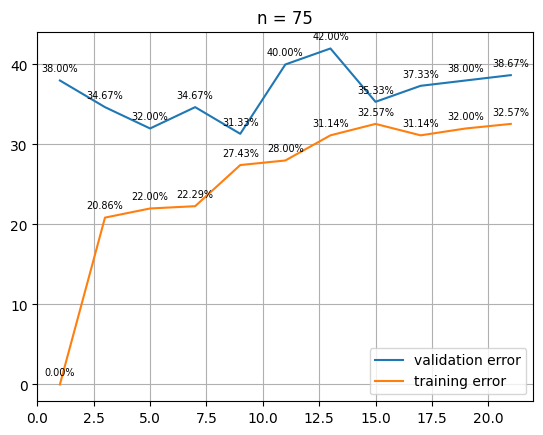

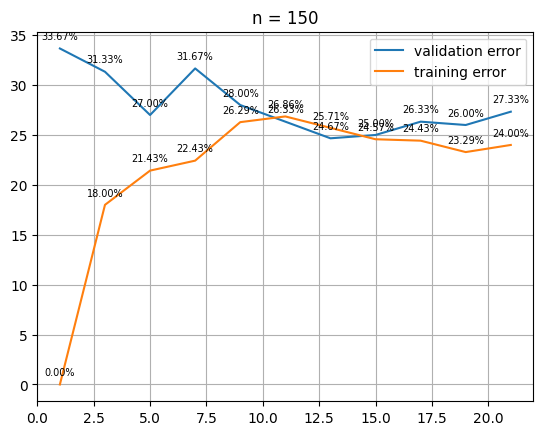

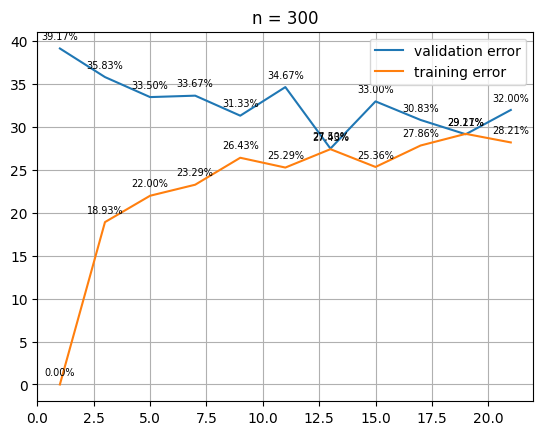

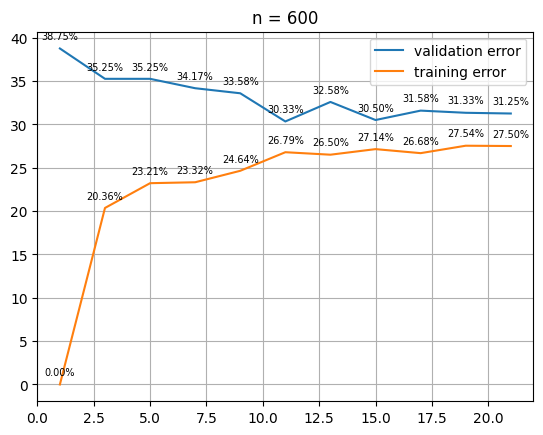

'\nTraining and validation errors are mostly the same\n'

In [102]:
##################################
#Part(d): Influence of training data on KNN classifier
##################################
#Performance evaluation as n increases

n_vals = [75, 150, 300, 600]
for n in n_vals:
  X_train_n, Y_train_n, ig, ig1 = generate(n)
  val_array_n, train_array_n = holdoutCVkNN(k_range, 5, 0.3, X_train_n, Y_train_n)
  plt.plot(k_range, val_array_n)
  plt.plot(k_range, train_array_n)
  plt.grid()
  for i, txt in enumerate(val_array_n):
    plt.annotate(f'{txt:.2f}%', (k_range[i], val_array_n[i]), textcoords="offset points", xytext=(0,5), ha='center', va='bottom',fontsize = 7)
  for i, txt in enumerate(train_array_n):
    plt.annotate(f'{txt:.2f}%', (k_range[i], train_array_n[i]), textcoords="offset points", xytext=(0,5), ha='center', va='bottom',fontsize = 7)
  plt.title(f"n = {n}")
  plt.legend(['validation error', 'training error'])
  plt.show()
'''
Training and validation error is slightly lower with higher training set size
'''

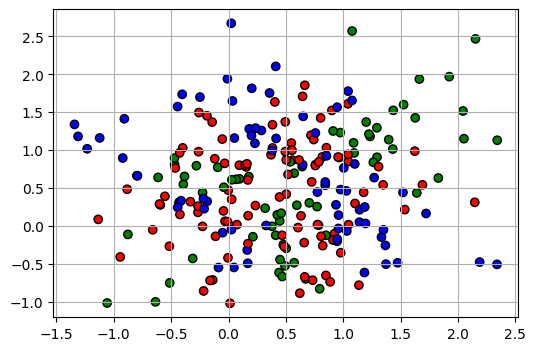

Accuracy = 57.49999999999999


'\nAccuracy is reduced significantly\n'

In [103]:
#Experiments with more difficult data set.
X_train_1, Y_train_1, X_test_1, Y_test_1 = generate(90)
#let us randomly flip 40% of the labels in training set
indices = np.random.choice(X_train_1.shape[0], int(X_train_1.shape[0]*0.4), replace = False)
for i in indices:
  Y_train_1[i] = Y_train_1[i]*-1
diff_pred = kNNClassify(X_train_1, Y_train_1, X_test_1, 11, L2)
colors = []
for i in range (0, diff_pred.size):
  if(diff_pred[i] != Y_test_1[i]):
    colors.append('red')
  elif(diff_pred[i] == -1):
    colors.append('blue')
  else:
    colors.append('green')
plt.figure(figsize=(6,4))
plt.grid()
plt.scatter(X_test_1[:,0], X_test_1[:,1], c = colors, edgecolor = 'k')
plt.show()
print(f"Accuracy = {KNNAccuracy(Y_test_1, diff_pred)}")
'''
Accuracy is reduced significantly
'''

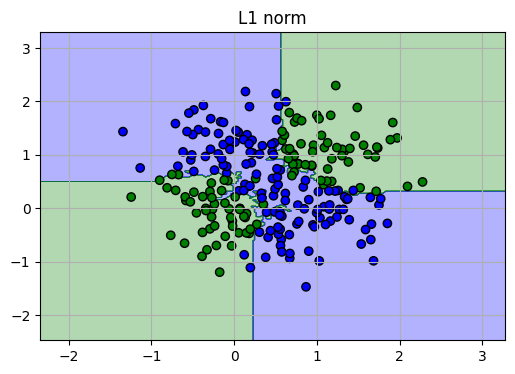

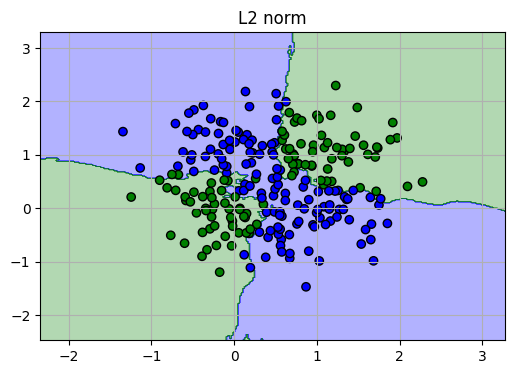

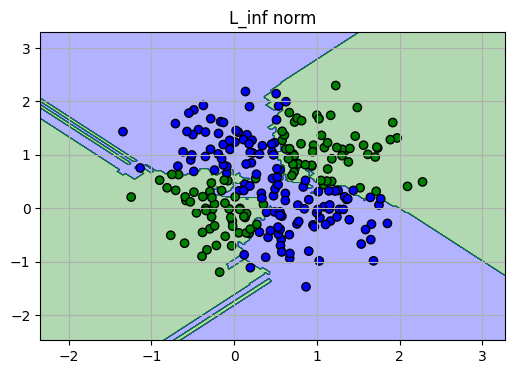

'\nA: For L1 norm, outliers do not affect the boundary much since their differences are not squared, and the decision boundary is divided roughly into grids\nFor L2 norm, outliers distort the decision boundaries, and we assume features are equally weighted. Furthermore we can see that the decision boundary is no longer like a grid\nbut slightly curved\nInfinitive norm is sensitive to outliers and the boundaries seem similar to L2 norm but are more straight\n'

In [104]:
##################################
#Part(e): Influence of distance measure on KNN classifier
##################################
#Performance evaluation of KNN classifier with different distance measures
h = 0.02  # step size in the mesh

X_min = 100000
X_max = -100000
Y_min = 100000
Y_max = -100000
for i in X_test:
  X_min = min(i[0], X_min)
  X_max = max(i[0], X_max)
  Y_min = min(i[1], Y_min)
  Y_max = max(i[1], Y_max)
X_min = X_min - 1
X_max = X_max + 1
Y_min = Y_min - 1
Y_max = Y_max + 1

xx, yy = np.meshgrid(np.arange(X_min, X_max, h), np.arange(Y_min, Y_max, h))

# Use the kNNClassify function to get predictions for each point in the meshgrid
Z = np.array(kNNClassify(X_train, Y_train, np.c_[xx.ravel(), yy.ravel()], 25, L1))
Z = Z.reshape(xx.shape)
plt.figure(figsize=(6,4))
plt.title('L1 norm')
plt.grid()
plt.contourf(xx, yy, Z, cmap=ListedColormap(['blue', 'green']), alpha=0.3)
plt.scatter(X_test[:,0], X_test[:,1], c = ['blue' if x == -1 else 'green' for x in pred], edgecolor = 'k')
plt.show()

Z = np.array(kNNClassify(X_train, Y_train, np.c_[xx.ravel(), yy.ravel()], 25, L2))
Z = Z.reshape(xx.shape)
plt.figure(figsize=(6,4))
plt.title('L2 norm')
plt.grid()
plt.contourf(xx, yy, Z, cmap=ListedColormap(['blue', 'green']), alpha=0.3)
plt.scatter(X_test[:,0], X_test[:,1], c = ['blue' if x == -1 else 'green' for x in pred], edgecolor = 'k')
plt.show()

Z = np.array(kNNClassify(X_train, Y_train, np.c_[xx.ravel(), yy.ravel()], 25, L_inf))
Z = Z.reshape(xx.shape)
plt.figure(figsize=(6,4))
plt.title('L_inf norm')
plt.grid()
plt.contourf(xx, yy, Z, cmap=ListedColormap(['blue', 'green']), alpha=0.3)
plt.scatter(X_test[:,0], X_test[:,1], c = ['blue' if x == -1 else 'green' for x in pred], edgecolor = 'k')
plt.show()

#Understand the decision regions of KNN classifier with different distance measures
'''
A: For L1 norm, outliers do not affect the boundary much since their differences are not squared, and the decision boundary is divided roughly into grids
For L2 norm, outliers distort the decision boundaries, and we assume features are equally weighted. Furthermore we can see that the decision boundary is no longer like a grid
but slightly curved
Infinitive norm is sensitive to outliers and the boundaries seem similar to L2 norm but are more straight and there are more variations due to the outliers
'''


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


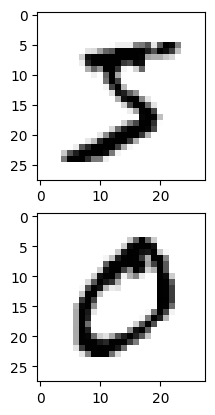

In [105]:
##################################
#Part(f): Influence of distance measure on KNN classifier
##################################

#Load MNIST data
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
images = mnist.data.to_numpy()
targets = mnist.target.to_numpy()
#Plot a few images
plt.subplot(211)
plt.imshow((images[0].reshape(28,28)), cmap=plt.cm.gray_r, interpolation='nearest')
plt.subplot(212)
plt.imshow(images[1].reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')

In [106]:
def L2_norm(x1, x2):
  x2 = x2-x1
  return np.linalg.norm(x2)

import seaborn as sns

In [107]:
#Create train, validation and test splits
#Taking only 5k out of 70k images since 70k images takes too long
targets_cut = targets[:5000]
train = np.random.choice(targets_cut.shape[0], int(targets_cut.shape[0]*0.8), replace = False)
l = []
newims = []
for i in range(0, targets_cut.shape[0]):
  newims.append(images[i].reshape(28,28))
newims = np.array(newims)
for i in range(0, targets_cut.shape[0]):
  if i not in train:
    l.append(i)
l = np.array(l)
validation = np.random.choice(l, int(l.shape[0]/2), replace = False)
test = []
for i in l:
  if i not in validation:
    test.append(i)
test = np.array(test)

#Write 'MultiClassKNNClassify' function
def check_acc(true, pred):
  cnt = 0
  for i in range(true.shape[0]):
    if(true[i].astype(int) == pred[i].astype(int)):
      cnt += 1
  cnt = cnt/true.shape[0]
  return cnt

def MultiClassKNNClassify(k, test):
  classify = []
  for ind in test:
    dist = []
    for check in train:
      dist.append((L2_norm(newims[ind], newims[check]), targets[check]))
    dist = np.array(dist)
    sorted = np.argsort(dist[:, 0])
    labels = np.zeros(10)
    for i in range(0, k):
       labels[dist[sorted[i]][1].astype(int)] += 1
    mx = 0
    for i in range(0, 10):
      if(labels[i] > labels[mx]):
        mx = i
    classify.append(mx)
  classify = np.array(classify)
  true = []
  for i in test:
    true.append(targets[i])
  true = np.array(true)
  acc = check_acc(true, classify)
  return classify, acc
#Empirically chose most suitable k and error function based on the evauation on cross-validation data
#Evaluate the performance using different values of 'k' on the validation data and select the optimal 'k' for the test data.
#Evaluation the performance using different distance measures (l1,l2, etc) on the validation data and select the optimal distance measure for test data.
k_ranges = [3, 9, 13, 21, 29, 41, 91, 79]
bestpred, bestacc = MultiClassKNNClassify(11, validation)
bestk = 11
for k in k_ranges:
  newpred, newacc = MultiClassKNNClassify(k, validation)
  if(newacc > bestacc):
    bestk = k
#Evaluate the performance on test data with the best hyper parameters ( k, error_func ) obtained from cross validation
print(f"The best k = {bestk}")
np.concatenate((test, validation))
pred, acc = MultiClassKNNClassify(bestk, test)
print(f"Accuracy = {acc*100}")
true = []
for i in test:
  true.append(targets[i])
true = np.array(true)


The best k = 9
Accuracy = 93.0


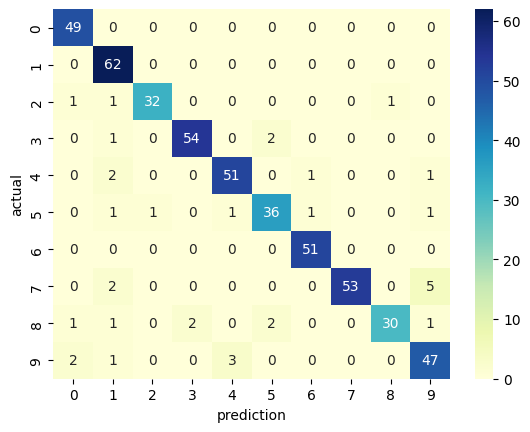

"\nObservation: Most common misprediction is 7 being predicted as 9\nall 0's are predicted perfectly in this data\n"

In [111]:
#Create a confusion matrix for test data
def compute_confusion_matrix(true, pred):
    '''
    Inputs: Ground truth labels and classifier predictions
    Outputs: Confusion matrix
    '''
    cm = np.zeros((10,10))
    for i in range(0, true.shape[0]):
      cm[true[i].astype(int)][pred[i].astype(int)]+=1
    sns.heatmap(cm, annot=True, fmt='g', cmap = 'YlGnBu')
    plt.xlabel('prediction')
    plt.ylabel('actual')
    plt.show()
compute_confusion_matrix(true, pred)
#Suggest an alternative ways to improve performance
'''
Can normalise the pixel values so that all pixels have similar weight
Can try other algorithms
Can try other image processing methods like edge detection, corner detection
'''
'''
Observation: Most common misprediction is 7 being predicted as 9
all 0's are predicted perfectly in this data
'''